In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras import regularizers


import matplotlib.pyplot as plt
import pandas as pd


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:


# Read CSV file into a DataFrame
file_path = 'C:/Drive_d/machine_learning/Project/bus_evaluation/bus_data_lambda.csv' 
bus_data = pd.read_csv(file_path)

# Display the DataFrame

bus_data.head()


,Vehicle ID,Timestamp,Latitude,Longitude,Heading,Pattern ID,Route,Destination,Distance,Delay
0,1281,20240419 20:59,41.720495,-87.623643,3,18414,3,Michigan/Chicago,65,False
1,8458,20240419 21:00,41.745479,-87.614780,4,18414,3,Michigan/Chicago,11709,False
2,1329,20240419 21:00,41.747861,-87.614809,1,18414,3,Michigan/Chicago,12573,False
3,1297,20240419 20:59,41.787675,-87.615723,358,18414,3,Michigan/Chicago,27177,False
4,8526,20240419 20:59,41.809336,-87.616501,359,18414,3,Michigan/Chicago,35116,False


In [3]:
# Convert Timestamp column to datetime
bus_data['Timestamp'] = pd.to_datetime(bus_data['Timestamp'], format='%Y%m%d %H:%M')

# Extract date and time into separate columns
bus_data['Date'] = bus_data['Timestamp'].dt.date
bus_data['Time'] = bus_data['Timestamp'].dt.time

In [4]:
bus_data = bus_data[['Vehicle ID', 'Date', 'Time', 'Latitude', 'Longitude', 'Heading', 'Pattern ID', 'Route', 'Destination', 'Distance', 'Delay']]

In [5]:
bus_data['Date'] = pd.to_datetime(bus_data['Date'])
bus_data['DayOfWeek'] = bus_data['Date'].dt.day_name()
bus_data_VIDdrop = bus_data.drop(columns=['Vehicle ID'])
bus_data_VID_hdg_drp = bus_data.drop(columns=['Heading'])

In [6]:
def categorize_time(time):
    hour = time.hour
    if 4 <= hour <= 9:
        return 'morning'
    elif 10 <= hour <= 15:
        return 'midday'
    elif 16 <= hour <= 21:
        return 'evening'
    else:
        return 'night'
    

# Apply the categorize_time function to create a new column 'TimeCategory'
bus_data_VID_hdg_drp['TimeCategory'] = bus_data_VID_hdg_drp['Time'].apply(categorize_time)


In [7]:
# List of columns to remove
columns_to_remove = ['Vehicle ID', 'Date', 'Time','Pattern ID', 'Route']

bus_data_final = bus_data_VID_hdg_drp.drop(columns=columns_to_remove).copy()

In [8]:
# Assuming you've already created the DataFrame bus_data_final
bus_data_final_delenc = bus_data_final.copy()

# Convert 'Delay' column to binary values (1 and 0)
bus_data_final_delenc['Delay'] = bus_data_final['Delay'].map({True: 1, False: 0})

In [9]:
# Perform one-hot encoding for categorical variables
bus_data_encoded = pd.get_dummies(bus_data_final_delenc, columns=['Destination', 'DayOfWeek', 'TimeCategory'])

# Drop one of the generated columns for each categorical variable
bus_data_encoded.drop(columns=['Destination_79th', 'DayOfWeek_Sunday', 'TimeCategory_night'], inplace=True)

In [10]:
bus_data_encoded_final = bus_data_encoded[['Delay','Latitude','Longitude','Distance', 'Destination_95th Red Line',
       'Destination_Michigan/Chicago', 'DayOfWeek_Friday', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Tuesday', 'TimeCategory_evening',
       'TimeCategory_midday', 'TimeCategory_morning']].copy()


In [11]:
# Create a copy of bus_data_encoded_final
bus_data_scaled = bus_data_encoded_final.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the "Distance" feature
bus_data_scaled['Distance_scaled'] = scaler.fit_transform(bus_data_scaled[['Distance']])
bus_data_scaled['Lat_scaled' ] = scaler.fit_transform(bus_data_scaled[['Latitude']])
bus_data_scaled['Lon_scaled' ] = scaler.fit_transform(bus_data_scaled[['Longitude']])

# Drop the original "Distance" column if needed
bus_data_scaled.drop(columns=['Distance', 'Latitude', 'Longitude'], inplace=True)

bus_data_scaled.head()

,Delay,Destination_95th Red Line,Destination_Michigan/Chicago,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Tuesday,TimeCategory_evening,TimeCategory_midday,TimeCategory_morning,Distance_scaled,Lat_scaled,Lon_scaled
0,0,0,1,1,0,0,0,1,0,0,0.000875,0.031053,0.105353
1,0,0,1,1,0,0,0,1,0,0,0.157631,0.168229,0.935373
2,0,0,1,1,0,0,0,1,0,0,0.169263,0.181306,0.932711
3,0,0,1,1,0,0,0,1,0,0,0.365867,0.399912,0.847103
4,0,0,1,1,0,0,0,1,0,0,0.472745,0.518846,0.774227
5,0,0,1,1,0,0,0,1,0,0,0.572152,0.629571,0.727318
6,0,0,1,1,0,0,0,1,0,0,0.620630,0.683504,0.722070
7,0,0,1,1,0,0,0,1,0,0,0.785154,0.844806,0.073826
8,0,0,1,1,0,0,0,1,0,0,0.944575,0.989088,0.412704
9,0,1,0,1,0,0,0,1,0,0,0.000000,0.982451,0.459859


In [93]:

def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Bus ontime detected(True Negatives): ', cm[0][0])
  print('Bus ontime Incorrectly Detected (False Positives): ', cm[0][1])
  print('Bus delay Missed (False Negatives): ', cm[1][0])
  print('Bus delay Detected (True Positives): ', cm[1][1])
  print('Total Bus Delays: ', np.sum(cm[1]))

# Algorithms

### Logistic Regression

Accuracy: 0.9811875367430923
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


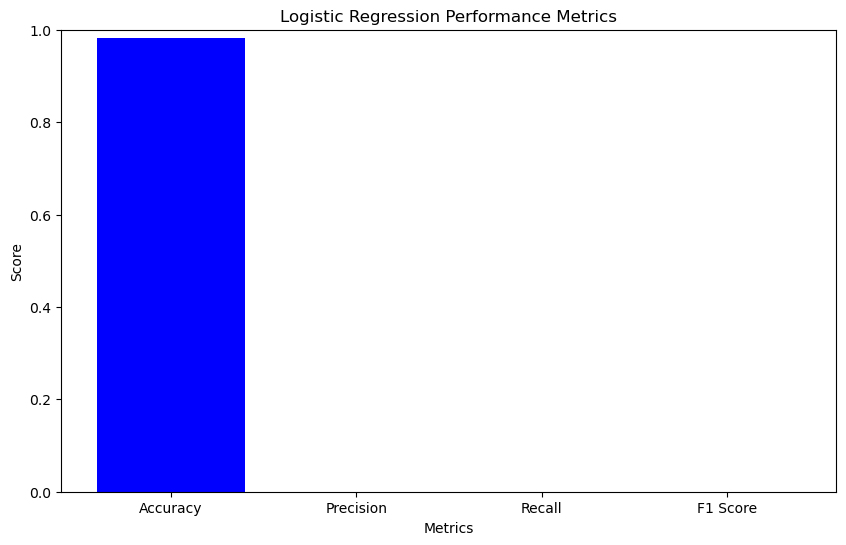

Bus ontime detected(True Negatives):  1669
Bus ontime Incorrectly Detected (False Positives):  0
Bus delay Missed (False Negatives):  32
Bus delay Detected (True Positives):  0
Total Bus Delays:  32


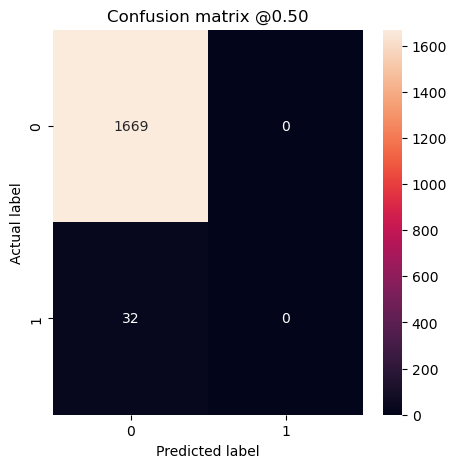

In [46]:
# Prepare X (features) and y (target variable)
X = bus_data_scaled.drop(columns=['Delay'])
y = bus_data_scaled['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred_log = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Create a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Logistic Regression Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()

plot_cm(y_test, y_pred_log)

### Random Over sampler Logistic regression

Accuracy:  0.7677836566725456
Precision: 0.05405405405405406
Recall: 0.6875
F1 Score: 0.10022779043280182


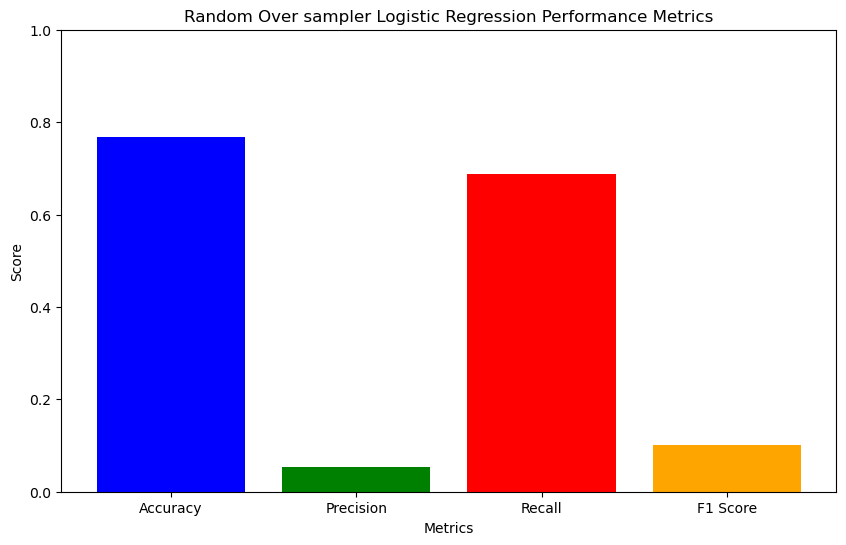

Bus ontime detected(True Negatives):  1648
Bus ontime Incorrectly Detected (False Positives):  21
Bus delay Missed (False Negatives):  22
Bus delay Detected (True Positives):  10
Total Bus Delays:  32


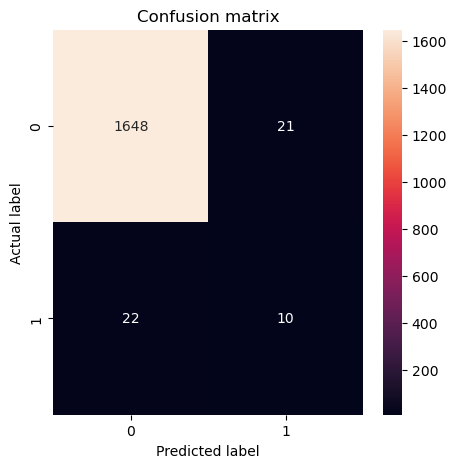

In [129]:
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to oversample the minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Predict on the testing set
y_pred_oslr = model.predict(X_test)


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_oslr)
precision = precision_score(y_test, y_pred_oslr)
recall = recall_score(y_test, y_pred_oslr)
f1 = f1_score(y_test, y_pred_oslr)

# Evaluate the model
print("Accuracy: ",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

import matplotlib.pyplot as plt


# Create a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Random Over sampler Logistic Regression Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()

plot_cm(y_test, y_pred)

## Random Forrest

Accuracy: 0.9794238683127572
Precision: 0.42857142857142855
Recall: 0.28125
F1 Score: 0.33962264150943394


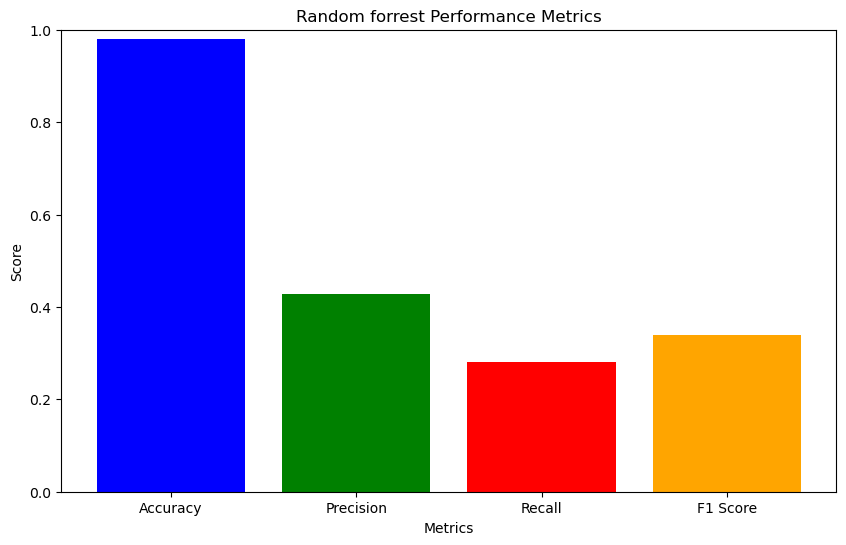

Bus ontime detected(True Negatives):  1657
Bus ontime Incorrectly Detected (False Positives):  12
Bus delay Missed (False Negatives):  23
Bus delay Detected (True Positives):  9
Total Bus Delays:  32


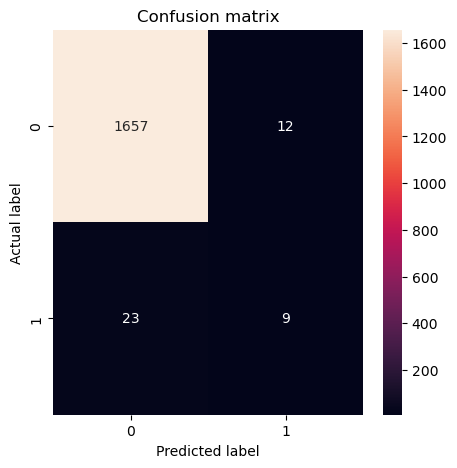

In [164]:
#Random forrest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare X (features) and y (target variable)
X = bus_data_scaled.drop(columns=['Delay'])
y = bus_data_scaled['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Create a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Random forrest Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()

plot_cm(y_test, y_pred_rf)

### SVM

Accuracy: 0.9811875367430923
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


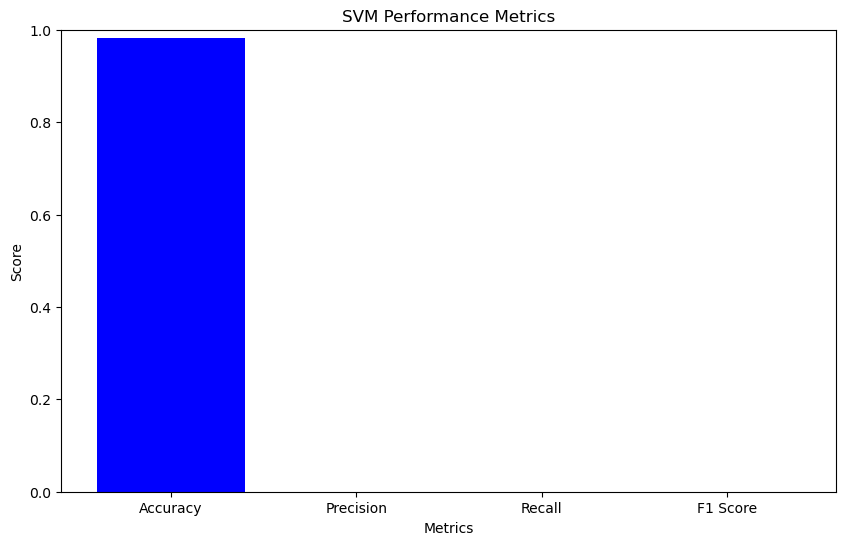

In [130]:
#SVM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare X (features) and y (target variable)
X = bus_data_scaled.drop(columns=['Delay'])
y = bus_data_scaled['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machines classifier
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('SVM Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()

### XGB Classifier

Accuracy: 0.9782480893592005
Precision: 0.38095238095238093
Recall: 0.25
F1 Score: 0.3018867924528302


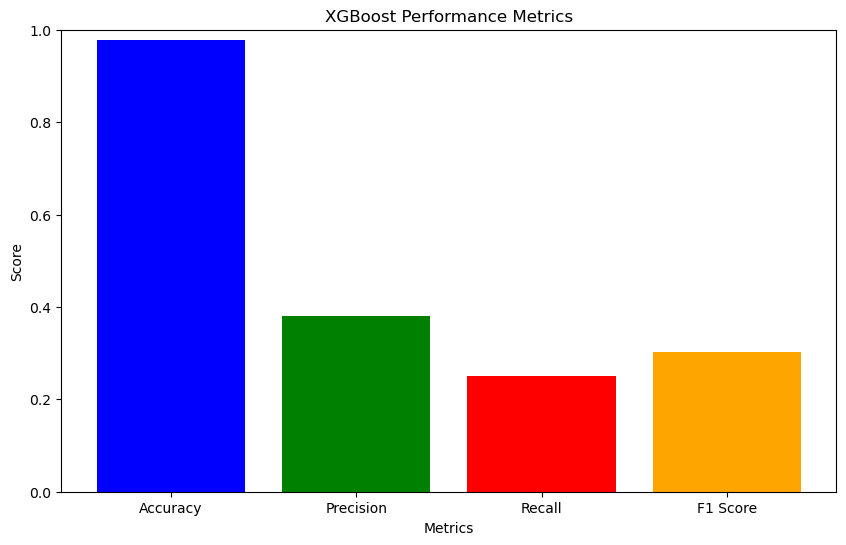

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare X (features) and y (target variable)
X = bus_data_scaled.drop(columns=['Delay'])
y = bus_data_scaled['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred_xgb = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

import matplotlib.pyplot as plt


# Create a bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('XGBoost Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()


Decision Tree Metrics:
Accuracy: 0.9747207524985303
Precision: 0.3225806451612903
Recall: 0.3125
F1 Score: 0.31746031746031744
Bus ontime detected(True Negatives):  1648
Bus ontime Incorrectly Detected (False Positives):  21
Bus delay Missed (False Negatives):  22
Bus delay Detected (True Positives):  10
Total Bus Delays:  32


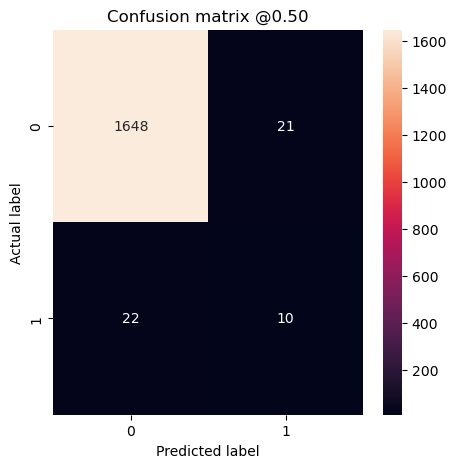

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Prepare X (features) and y (target variable)
X_sc = bus_data_scaled.drop(columns=['Delay'])
y_sc = bus_data_scaled['Delay']

# Split the data into training and testing sets
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y_sc, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_sc, y_train_sc)

# Predict on the testing set
y_pred_sc = tree_clf.predict(X_test_sc)

# Evaluate the model
accuracy_sc = accuracy_score(y_test_sc, y_pred_sc)
precision_sc = precision_score(y_test_sc, y_pred_sc)
recall_sc = recall_score(y_test_sc, y_pred_sc)
f1_sc = f1_score(y_test_sc, y_pred_sc)

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_sc)
print("Precision:", precision_sc)
print("Recall:", recall_sc)
print("F1 Score:", f1_sc)


plot_cm(y_test, y_pred_sc)

Accuracy: 0.9747207524985303
Precision: 0.3225806451612903
Recall: 0.3125
F1 Score: 0.31746031746031744
Bus ontime detected(True Negatives):  1648
Bus ontime Incorrectly Detected (False Positives):  21
Bus delay Missed (False Negatives):  22
Bus delay Detected (True Positives):  10
Total Bus Delays:  32


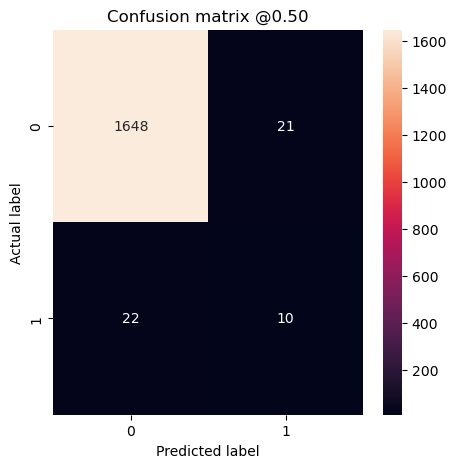

In [49]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply RandomOverSampler to oversample the minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict on the testing set
y_pred_rfos = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfos)
precision = precision_score(y_test, y_pred_rfos)
recall = recall_score(y_test, y_pred_rfos)
f1 = f1_score(y_test, y_pred_rfos)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plot_cm(y_test, y_pred_rfos)


Random Under Sampler:
Accuracy: 0.8982951205173427
Precision: 0.14213197969543148
Recall: 0.875
F1 Score: 0.2445414847161572
Bus ontime detected(True Negatives):  1500
Bus ontime Incorrectly Detected (False Positives):  169
Bus delay Missed (False Negatives):  4
Bus delay Detected (True Positives):  28
Total Bus Delays:  32


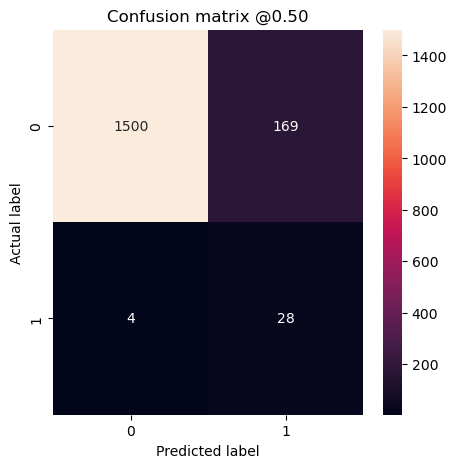

In [47]:
from imblearn.under_sampling import RandomUnderSampler
# Apply RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the undersampled data
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_resampled_under, y_resampled_under)

# Predict on the testing set
y_pred_under = model_under.predict(X_test)

# Evaluate the model with RandomUnderSampler
accuracy_under = accuracy_score(y_test, y_pred_under)
precision_under = precision_score(y_test, y_pred_under)
recall_under = recall_score(y_test, y_pred_under)
f1_under = f1_score(y_test, y_pred_under)

print("\nRandom Under Sampler:")
print("Accuracy:", accuracy_under)
print("Precision:", precision_under)
print("Recall:", recall_under)
print("F1 Score:", f1_under)

plot_cm(y_test, y_pred_under)


Random Under Sampler with Custom Threshold:
Accuracy: 0.7977660199882423
Precision: 0.07608695652173914
Recall: 0.875
F1 Score: 0.14
Bus ontime detected(True Negatives):  1329
Bus ontime Incorrectly Detected (False Positives):  340
Bus delay Missed (False Negatives):  4
Bus delay Detected (True Positives):  28
Total Bus Delays:  32


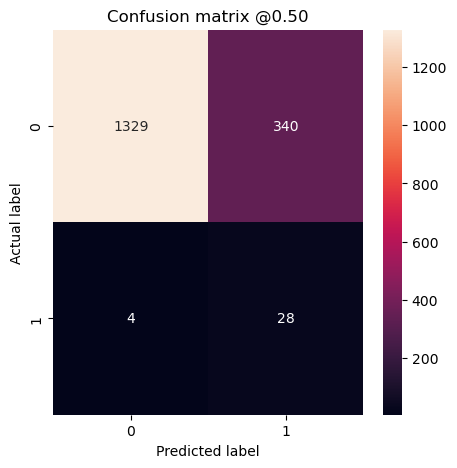

In [86]:
from imblearn.under_sampling import RandomUnderSampler
# Apply RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the undersampled data
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_resampled_under, y_resampled_under)

# Get the probability estimates for each class
y_prob_under = model_under.predict_proba(X_test)

# Assuming the positive class is '1', you can set a custom threshold
threshold = 0.3  # Example threshold value

# Convert probabilities to binary predictions based on the threshold
y_pred_binary = (y_prob_under[:, 1] > threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_threshold = accuracy_score(y_test, y_pred_binary)
precision_threshold = precision_score(y_test, y_pred_binary)
recall_threshold = recall_score(y_test, y_pred_binary)
f1_threshold = f1_score(y_test, y_pred_binary)

print("\nRandom Under Sampler with Custom Threshold:")
print("Accuracy:", accuracy_threshold)
print("Precision:", precision_threshold)
print("Recall:", recall_threshold)
print("F1 Score:", f1_threshold)

plot_cm(y_test, y_pred_binary)


Random Over Sampler with Custom Threshold:
Accuracy: 0.9606114050558495
Precision: 0.2602739726027397
Recall: 0.59375
F1 Score: 0.3619047619047619
Bus ontime detected(True Negatives):  1615
Bus ontime Incorrectly Detected (False Positives):  54
Bus delay Missed (False Negatives):  13
Bus delay Detected (True Positives):  19
Total Bus Delays:  32


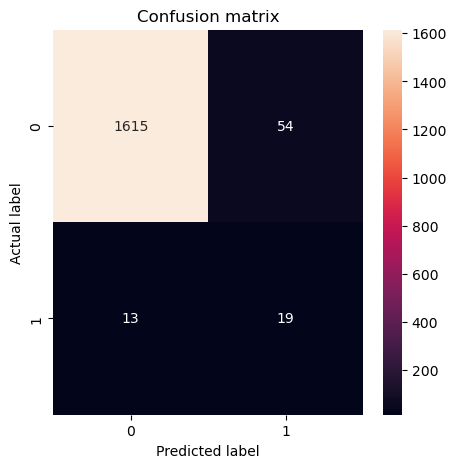

In [139]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply RandomOverSampler to oversample the minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Get the probability estimates for each class
y_prob_under = model.predict_proba(X_test)


threshold = 0.1  # Example threshold value

# Convert probabilities to binary predictions based on the threshold
y_pred_binary = (y_prob_under[:, 1] > threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_threshold = accuracy_score(y_test, y_pred_binary)
precision_threshold = precision_score(y_test, y_pred_binary)
recall_threshold = recall_score(y_test, y_pred_binary)
f1_threshold = f1_score(y_test, y_pred_binary)

print("\nRandom Over Sampler with Custom Threshold:")
print("Accuracy:", accuracy_threshold)
print("Precision:", precision_threshold)
print("Recall:", recall_threshold)
print("F1 Score:", f1_threshold)

plot_cm(y_test, y_pred_binary)


Random Under Sampler with Custom Threshold:
Accuracy: 0.9318048206937096
Precision: 0.1865671641791045
Recall: 0.78125
F1 Score: 0.30120481927710846
Bus ontime detected(True Negatives):  1560
Bus ontime Incorrectly Detected (False Positives):  109
Bus delay Missed (False Negatives):  7
Bus delay Detected (True Positives):  25
Total Bus Delays:  32


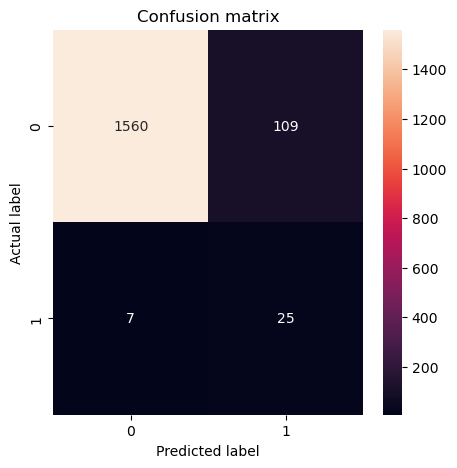

In [163]:
#Random forrest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare X (features) and y (target variable)
X = bus_data_scaled.drop(columns=['Delay'])
y = bus_data_scaled['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the probability estimates for each class
y_prob_under = model.predict_proba(X_test)


threshold = 0.017

# Convert probabilities to binary predictions based on the threshold
y_pred_binary = (y_prob_under[:, 1] > threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_threshold = accuracy_score(y_test, y_pred_binary)
precision_threshold = precision_score(y_test, y_pred_binary)
recall_threshold = recall_score(y_test, y_pred_binary)
f1_threshold = f1_score(y_test, y_pred_binary)

print("\nRandom Under Sampler with Custom Threshold:")
print("Accuracy:", accuracy_threshold)
print("Precision:", precision_threshold)
print("Recall:", recall_threshold)
print("F1 Score:", f1_threshold)

plot_cm(y_test, y_pred_binary)


Random Under Sampler with Custom Threshold:
Accuracy: 0.9782480893592005
Precision: 0.41935483870967744
Recall: 0.40625
F1 Score: 0.4126984126984127
Bus ontime detected(True Negatives):  1651
Bus ontime Incorrectly Detected (False Positives):  18
Bus delay Missed (False Negatives):  19
Bus delay Detected (True Positives):  13
Total Bus Delays:  32


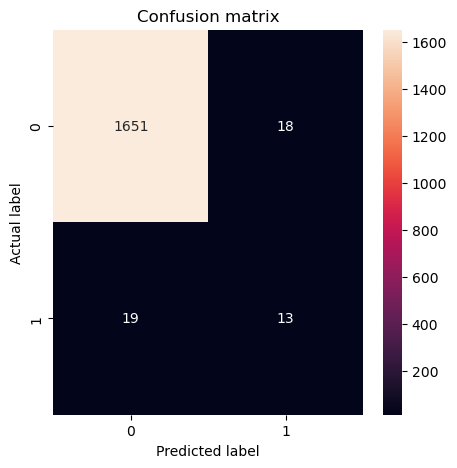

In [152]:
#Random forrest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare X (features) and y (target variable)
X = bus_data_scaled.drop(columns=['Delay'])
y = bus_data_scaled['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the probability estimates for each class
y_prob_under = model.predict_proba(X_test)


threshold = 0.3  

# Convert probabilities to binary predictions based on the threshold
y_pred_binary = (y_prob_under[:, 1] > threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_threshold = accuracy_score(y_test, y_pred_binary)
precision_threshold = precision_score(y_test, y_pred_binary)
recall_threshold = recall_score(y_test, y_pred_binary)
f1_threshold = f1_score(y_test, y_pred_binary)

print("\nRandom Under Sampler with Custom Threshold:")
print("Accuracy:", accuracy_threshold)
print("Precision:", precision_threshold)
print("Recall:", recall_threshold)
print("F1 Score:", f1_threshold)

plot_cm(y_test, y_pred_binary)


Random Under Sampler with Custom Threshold:
Accuracy: 0.9676660787771899
Precision: 0.31746031746031744
Recall: 0.625
F1 Score: 0.42105263157894735
Bus ontime detected(True Negatives):  1626
Bus ontime Incorrectly Detected (False Positives):  43
Bus delay Missed (False Negatives):  12
Bus delay Detected (True Positives):  20
Total Bus Delays:  32


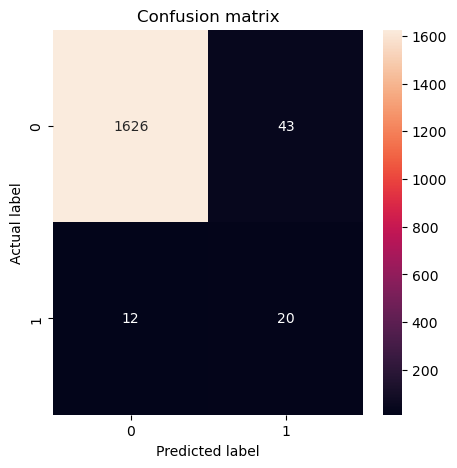

In [150]:
#Random forrest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare X (features) and y (target variable)
X = bus_data_scaled.drop(columns=['Delay'])
y = bus_data_scaled['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the probability estimates for each class
y_prob_under = model.predict_proba(X_test)


threshold = 0.1  

# Convert probabilities to binary predictions based on the threshold
y_pred_binary = (y_prob_under[:, 1] > threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_threshold = accuracy_score(y_test, y_pred_binary)
precision_threshold = precision_score(y_test, y_pred_binary)
recall_threshold = recall_score(y_test, y_pred_binary)
f1_threshold = f1_score(y_test, y_pred_binary)

print("\nRandom Under Sampler with Custom Threshold:")
print("Accuracy:", accuracy_threshold)
print("Precision:", precision_threshold)
print("Recall:", recall_threshold)
print("F1 Score:", f1_threshold)

plot_cm(y_test, y_pred_binary)


Random Under Sampler with Custom Threshold:
Accuracy: 0.9282774838330394
Precision: 0.17857142857142858
Recall: 0.78125
F1 Score: 0.29069767441860467
Bus ontime detected(True Negatives):  1554
Bus ontime Incorrectly Detected (False Positives):  115
Bus delay Missed (False Negatives):  7
Bus delay Detected (True Positives):  25
Total Bus Delays:  32


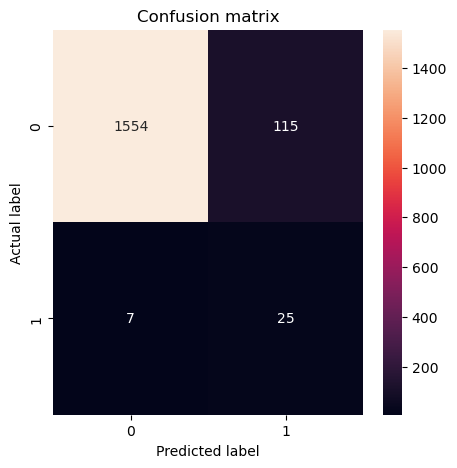

In [135]:
#Random forrest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare X (features) and y (target variable)
X = bus_data_scaled.drop(columns=['Delay'])
y = bus_data_scaled['Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the probability estimates for each class
y_prob_under = model.predict_proba(X_test)


threshold = 0.01  

# Convert probabilities to binary predictions based on the threshold
y_pred_binary = (y_prob_under[:, 1] > threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_threshold = accuracy_score(y_test, y_pred_binary)
precision_threshold = precision_score(y_test, y_pred_binary)
recall_threshold = recall_score(y_test, y_pred_binary)
f1_threshold = f1_score(y_test, y_pred_binary)

print("\nRandom Under Sampler with Custom Threshold:")
print("Accuracy:", accuracy_threshold)
print("Precision:", precision_threshold)
print("Recall:", recall_threshold)
print("F1 Score:", f1_threshold)

plot_cm(y_test, y_pred_binary)